In [1]:
import torch
import torch.utils.data
import torchvision
from glob import glob
import json
import os
from pathlib import Path
import random
from PIL import Image
from zipfile import ZipFile
import torchvision.transforms as transforms

import numpy as np

In [2]:
config = json.load(open(os.path.expanduser("~/.thesis.conf")))
db_folder = Path(config['datasets']) / 'hisdb'
modules   = Path(config['project']) / 'src'

%load_ext autoreload
%autoreload 2
import sys
sys.path.append(str(modules))

In [4]:
from datasets.divahisdb import HisDBDataset
hisdb = HisDBDataset(db_folder, gt=True)
page = hisdb[0][0]

In [5]:
page.crop

<bound method Image.crop of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4872x6496 at 0x7FE3AD909748>>

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

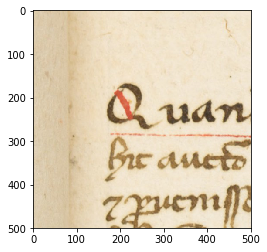

In [72]:
xpos, ypos, size = 0,700, 500 
box = (xpos,ypos,xpos+size,ypos+size)
plt.imshow(hisdb[0][0].crop(box))

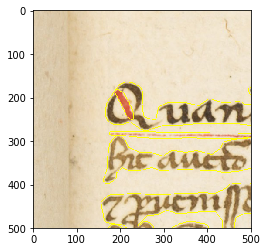

In [76]:
boximg   = hisdb[0][0].crop(box)
boxgtimg = hisdb[0][1].crop(box)
plt.imshow(mark_boundaries(np.array(boximg),
                           np.array(boxgtimg)[:,:,2]))

In [110]:
np.unique(np.array(boxgtimg.getdata()))

array([  0,   1,   2,   4,   6, 128])

In [130]:
#np.array(boxgtimg,dtype=np.int32).shape
np.array(boxgtimg.convert('I'),dtype=np.int32)
# pixel[2,2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [131]:
hex(0)

'0x0'

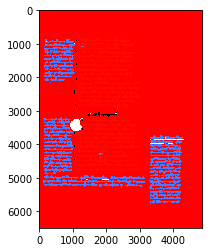

In [85]:
plt.imshow(np.array(hisdb[0][1])[:,:,], cmap='flag')

In [83]:
np.unique(np.array(hisdb[0][1])[:,:,:])

array([  0,   1,   2,   4,   6,   8,  10,  12, 128], dtype=uint8)

In [97]:
transforms.functional.to_tensor??

Signature: transforms.functional.to_tensor(pic)
Source:   
def to_tensor(pic):
    """Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.

    See ``ToTensor`` for more details.

    Args:
        pic (PIL Image or numpy.ndarray): Image to be converted to tensor.

    Returns:
        Tensor: Converted image.
    """
    if not(_is_pil_image(pic) or _is_numpy_image(pic)):
        raise TypeError('pic should be PIL Image or ndarray. Got {}'.format(type(pic)))

    if isinstance(pic, np.ndarray):
        # handle numpy array
        img = torch.from_numpy(pic.transpose((2, 0, 1)))
        # backward compatibility
        return img.float().div(255)

    if accimage is not None and isinstance(pic, accimage.Image):
        nppic = np.zeros([pic.channels, pic.height, pic.width], dtype=np.float32)
        pic.copyto(nppic)
        return torch.from_numpy(nppic)

    # handle PIL Image
    if pic.mode == 'I':
        img = torch.from_numpy(np.array(pic, np.int32, copy=False))
    elif pic